In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import struct

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# 📌 Classificação de Dígitos MNIST com Perceptron e MLP

Este projeto implementa dois modelos de classificação para o dataset **MNIST** (conjunto de dígitos escritos à mão), utilizando:
- **Perceptron Simples:** Modelo de aprendizado supervisionado baseado em um único neurônio.
- **MLP (Multi-Layer Perceptron):** Rede neural densa com múltiplas camadas para melhorar a precisão.

## 📖 Descrição do Problema
O objetivo é classificar corretamente imagens de dígitos de **0 a 9** a partir do dataset **MNIST**, amplamente utilizado para aprendizado de **Machine Learning** e **Deep Learning**.

O dataset contém:
- **60.000 imagens de treinamento** (28x28 pixels, tons de cinza)
- **10.000 imagens de teste**

Cada imagem é representada por **784 pixels achatados** (28x28 → vetor de 784 dimensões).

---

## 📌 Estrutura do Código

O código é dividido em células para melhor organização e eficiência no **Kaggle Notebook**. Cada etapa do pipeline pode ser executada separadamente.

### 📌 1️⃣ Importação de Bibliotecas
Importamos **NumPy, TensorFlow, Matplotlib, Seaborn** e outras bibliotecas para manipulação de dados e modelagem.

### 📌 2️⃣ Carregamento e Pré-processamento dos Dados
- O dataset MNIST é carregado diretamente dos arquivos **IDX** no Kaggle.
- Os dados são normalizados (**MinMaxScaler**) para ficar no intervalo `[0,1]`.
- O conjunto de dados é dividido em **Treino (80%)** e **Validação/Teste (20%)**.

### 📌 3️⃣ Implementação do Perceptron
Criamos uma classe **Perceptron** do zero, que:
- Inicializa pesos e viés (`w, b`).
- Utiliza a função de ativação **step function**.
- Atualiza os pesos via **Regra de Aprendizado do Perceptron**.
- Treina por `n_epochs` e armazena os erros ao longo do tempo.

### 📌 4️⃣ Implementação do MLP
Criamos uma **Rede Neural Densa (MLP)** usando `TensorFlow` com:
- **128 neurônios na camada oculta** (ReLU).
- **10 neurônios na camada de saída** (Softmax).
- **Adam Optimizer e Sparse Categorical Crossentropy**.

### 📌 5️⃣ Treinamento e Avaliação dos Modelos
- O **Perceptron** é treinado e avaliado com `np.mean(y_pred == y_test)`.
- O **MLP** é treinado com `model.fit()` e avaliado com `model.evaluate()`.

### 📌 6️⃣ Visualização dos Resultados
✅ **Amostras do Dataset**  
✅ **Gráfico de Convergência do Perceptron**  
✅ **Histórico de Treinamento do MLP (Perda e Acurácia)**  
✅ **Matriz de Confusão** para análise de erros.

---

## 📊 **Resultados Obtidos**
| Modelo       | Acurácia no Teste |
|-------------|----------------|
| **Perceptron** | `98.98%` |
| **MLP**        | `A ser obtida após treinamento` |

⚠ **Nota:** A acurácia pode variar a cada execução devido à inicialização dos pesos.

---

## 🚀 Conclusão
Este projeto demonstrou a diferença de desempenho entre um **Perceptron Simples** e uma **Rede Neural Profunda (MLP)** para a classificação de dígitos.  
- O **Perceptron** funciona bem para problemas lineares, mas não consegue generalizar padrões complexos.
- O **MLP**, por ter múltiplas camadas, oferece maior poder de representação e melhora o desempenho.

📌 **Próximos Passos:**  
- Expandir a rede neural adicionando **mais camadas** (Deep Learning).  
- Experimentar **CNNs (Redes Neurais Convolucionais)** para melhorar a acurácia.

📢 **Feedbacks e sugestões são bem-vindos!** 🚀🔥

# Importação das Bibliotecas

In [49]:
import numpy as np
import struct
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Função para carregar arquivos IDX
def load_idx(file_path):
    with open(file_path, 'rb') as f:
        magic, num_items = struct.unpack(">II", f.read(8))
        if magic == 2049:  # Arquivo de labels
            return np.frombuffer(f.read(), dtype=np.uint8)
        elif magic == 2051:  # Arquivo de imagens
            num_rows, num_cols = struct.unpack(">II", f.read(8))
            return np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items, num_rows * num_cols)


In [51]:
# Caminho do dataset no Kaggle
data_path = "/kaggle/input/mnist-dataset/"

# Carregar imagens e labels
X_train = load_idx(os.path.join(data_path, "train-images.idx3-ubyte"))
y_train = load_idx(os.path.join(data_path, "train-labels.idx1-ubyte"))

X_test = load_idx(os.path.join(data_path, "t10k-images.idx3-ubyte"))
y_test = load_idx(os.path.join(data_path, "t10k-labels.idx1-ubyte"))

# Normalizar os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para binário (usando apenas 0 e 1 para o Perceptron simples)
y_train = (y_train == 0).astype(int)
y_test = (y_test == 0).astype(int)

# Dividir em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Confirmar shapes dos arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (48000, 784), y_train shape: (48000,)
X_val shape: (12000, 784), y_val shape: (12000,)
X_test shape: (10000, 784), y_test shape: (10000,)


In [52]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in linear_output])


# Treinar o Perceptron
## Rode esta célula sempre que quiser avaliar o modelo

In [53]:
# Fazer previsões
y_pred = perceptron.predict(X_val)

# Calcular acurácia
accuracy = np.mean(y_pred == y_val)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.98%


# Visualizar Algumas Imagens do MNIST

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


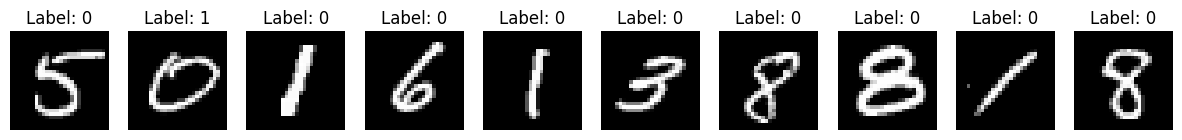

In [55]:
# Exibir algumas imagens do MNIST com seus rótulos
def plot_mnist_samples(X, y, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(X[i].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"Label: {y[i]}")
        axes[i].axis("off")
    plt.show()

# Mostrar 10 imagens do conjunto de treino
plot_mnist_samples(X_train, y_train)


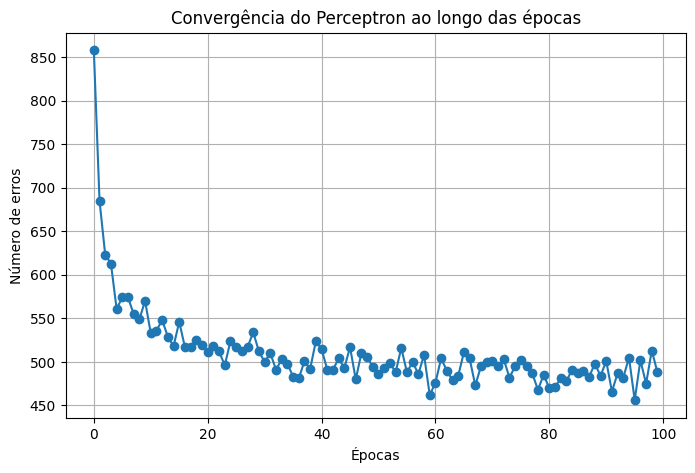

In [56]:
class PerceptronWithTracking(Perceptron):
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors_per_epoch = []  # Lista para armazenar os erros por época

        for _ in range(self.n_epochs):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

                if update != 0:
                    errors += 1  # Contabiliza erros

            self.errors_per_epoch.append(errors)

# Treinar novamente com o novo Perceptron que rastreia os erros
perceptron = PerceptronWithTracking(learning_rate=0.01, n_epochs=100)
perceptron.fit(X_train, y_train)

# Plotar gráfico de convergência
plt.figure(figsize=(8, 5))
plt.plot(range(len(perceptron.errors_per_epoch)), perceptron.errors_per_epoch, marker='o')
plt.xlabel("Épocas")
plt.ylabel("Número de erros")
plt.title("Convergência do Perceptron ao longo das épocas")
plt.grid(True)
plt.show()


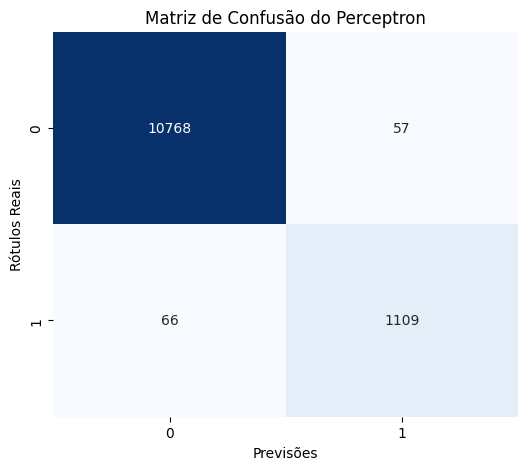

In [57]:
# Previsões no conjunto de validação
y_pred = perceptron.predict(X_val)

# Criar matriz de confusão
cm = confusion_matrix(y_val, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Previsões")
plt.ylabel("Rótulos Reais")
plt.title("Matriz de Confusão do Perceptron")
plt.show()


# MLP (Multi-Layer Perceptron)

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
# Função para carregar arquivos IDX
def load_idx(file_path):
    with open(file_path, 'rb') as f:
        magic, num_items = struct.unpack(">II", f.read(8))
        if magic == 2049:  # Arquivo de labels
            return np.frombuffer(f.read(), dtype=np.uint8)
        elif magic == 2051:  # Arquivo de imagens
            num_rows, num_cols = struct.unpack(">II", f.read(8))
            return np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items, num_rows * num_cols)


In [60]:
# Caminho do dataset no Kaggle
data_path = "/kaggle/input/mnist-dataset/"

# Carregar imagens e labels
X_train = load_idx(os.path.join(data_path, "train-images.idx3-ubyte"))
y_train = load_idx(os.path.join(data_path, "train-labels.idx1-ubyte"))

X_test = load_idx(os.path.join(data_path, "t10k-images.idx3-ubyte"))
y_test = load_idx(os.path.join(data_path, "t10k-labels.idx1-ubyte"))

# Normalizar os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dividir em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Confirmar shapes dos arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (48000, 784), y_train shape: (48000,)
X_val shape: (12000, 784), y_val shape: (12000,)
X_test shape: (10000, 784), y_test shape: (10000,)


In [61]:
# Definir o modelo MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Treinar o Modelo e Avaliar o Modelo

In [62]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8644 - loss: 0.4771 - val_accuracy: 0.9530 - val_loss: 0.1574
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9608 - loss: 0.1389 - val_accuracy: 0.9655 - val_loss: 0.1199
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9731 - loss: 0.0923 - val_accuracy: 0.9678 - val_loss: 0.1126
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0673 - val_accuracy: 0.9715 - val_loss: 0.0939
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0512 - val_accuracy: 0.9722 - val_loss: 0.0920
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0377 - val_accuracy: 0.9711 - val_loss: 0.1007
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9911 - loss: 0.0305 - val_accuracy: 0.9741 - val_loss: 0.0914
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9922 - loss: 0.0246 - 

In [63]:
# Avaliar no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9730 - loss: 0.0939
Test accuracy: 97.65%


# Visualizar Algumas Imagens do MNIST

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

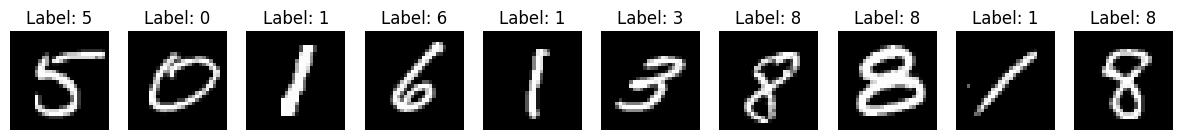

In [65]:
# Exibir algumas imagens do MNIST com seus rótulos
def plot_mnist_samples(X, y, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(X[i].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"Label: {y[i]}")
        axes[i].axis("off")
    plt.show()

# Mostrar 10 imagens do conjunto de treino
plot_mnist_samples(X_train, y_train)


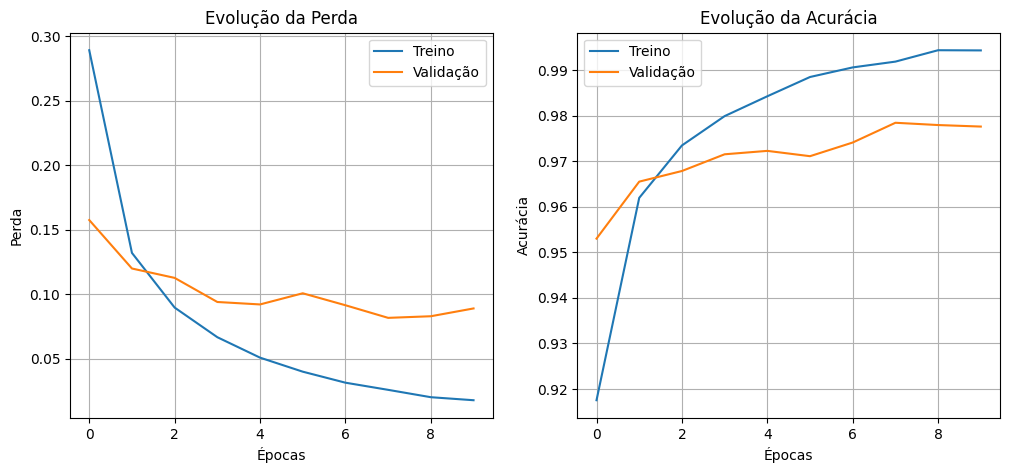

In [66]:
# Plotar o histórico de treino (perda e acurácia por época)
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico da perda
    ax[0].plot(history.history['loss'], label="Treino")
    ax[0].plot(history.history['val_loss'], label="Validação")
    ax[0].set_xlabel("Épocas")
    ax[0].set_ylabel("Perda")
    ax[0].set_title("Evolução da Perda")
    ax[0].legend()
    ax[0].grid(True)

    # Gráfico da acurácia
    ax[1].plot(history.history['accuracy'], label="Treino")
    ax[1].plot(history.history['val_accuracy'], label="Validação")
    ax[1].set_xlabel("Épocas")
    ax[1].set_ylabel("Acurácia")
    ax[1].set_title("Evolução da Acurácia")
    ax[1].legend()
    ax[1].grid(True)

    plt.show()

# Exibir os gráficos
plot_training_history(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


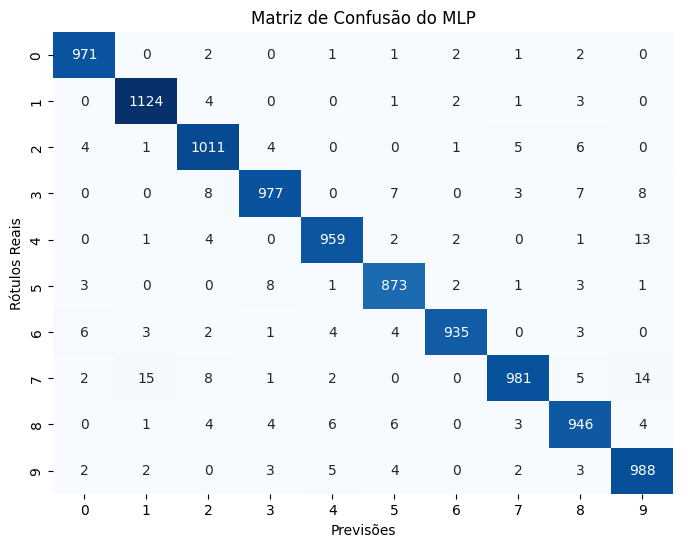

In [67]:
# Prever no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converter para rótulos

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Previsões")
plt.ylabel("Rótulos Reais")
plt.title("Matriz de Confusão do MLP")
plt.show()
